# Data overview

In this section, we detail the structure of the data converted into CSV. To understand this part correctly, please refer to the [data_convertion.md]() file first.

- Parameters
- Periods
- Rooms
- Exams
- Students
- Instructors
- Constraints

# Parameters
Values use inside the solver
| Property Name                                | Value       |
|---------------------------------------------|-------------|
| backToBackConflictWeight                    | 10.0        |
| backToBackDistance                          | -1.0        |
| directConflictWeight                        | 1000.0      |
| distanceBackToBackConflictWeight            | 25.0        |
| distanceToStronglyPreferredRoomWeight       | 1.0E-4      |
| distributionWeight                          | 1.0         |
| examRotationWeight                          | 1.0E-4      |
| instructorBackToBackConflictWeight          | 0.0         |
| instructorDirectConflictWeight              | 10.0        |
| instructorDistanceBackToBackConflictWeight  | 0.0         |
| instructorMoreThanTwoADayWeight             | 0.0         |
| isDayBreakBackToBack                        | false       |
| largePeriod                                 | 0.86        |
| largeSize                                   | 600         |
| largeWeight                                 | 2500000.0   |
| maxRooms                                    | 4           |
| moreThanTwoADayWeight                       | 100.0       |
| mpp                                         | false       |
| periodIndexWeight                           | 1.0E-7      |
| periodSizeWeight                            | 0.5         |
| periodWeight                                | 1.0         |
| perturbationWeight                          | 0.0010      |
| roomPerturbationWeight                      | 0.1         |
| roomSizeFactor                              | 1.1         |
| roomSizeWeight                              | 0.0010      |
| roomSplitDistanceWeight                     | 0.01        |
| roomSplitWeight                             | 10.0        |
| roomWeight                                  | 1.0         |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
def csv_to_df(filename: str) -> pd.DataFrame:
    return pd.read_csv(filename)

rooms_df = csv_to_df('./csv_data/rooms.csv')
students_df = csv_to_df('./csv_data/students.csv')
periods_df = csv_to_df('./csv_data/periods.csv')
constraints_df = csv_to_df('csv_data/constraints.csv') 
exams_df = csv_to_df('./csv_data/exams.csv')
instructors_df = csv_to_df('./csv_data/instructors.csv')

# Periods

| Column Name       | Data Type | Format|
|-------------------|-----------|-----|
| Period ID         | int64       ||
| Length (minutes)  | int64     ||
| Day               | string  |__%a %m/%d__    |
| Time              | string  |__%I:%M%p__    |
| Penalty           | int64      ||

- number of period : 29

In [2]:
periods_df.head()

,Period ID,Length (minutes),Day,Time,Penalty
0,1,120,Mon 12/10,8:00AM - 10:00AM,0
1,2,120,Mon 12/10,10:30AM - 12:30PM,0
2,3,120,Mon 12/10,1:00PM - 3:00PM,0
3,4,120,Mon 12/10,3:30PM - 5:30PM,0
4,5,120,Mon 12/10,7:00PM - 9:00PM,0


# Rooms
| Column Name   | Data Type | Format |
|---------------|-----------|--------|
| Room ID       | int64     ||
| Size          | int64     ||
| Alt Size      | int64     ||
| Coordinates   | string    | __float64,float64__|
| Period ID     | int64     ||
| Available     | bool      ||
| Penalty       | int64     ||

- row : 98695
- number of room : 486
- Size
    - Average : 60.9
    - min :  1
    - max : 6013
- Alternate size
    - Average : 33.6
    - min : 1
    - max : 2783

In [3]:
rooms_df.head()

,Room ID,Size,Alt Size,Coordinates,Period ID,Available,Penalty
0,1,27,14,"40.421707,-86.91657",1,True,4
1,1,27,14,"40.421707,-86.91657",2,True,4
2,1,27,14,"40.421707,-86.91657",3,True,4
3,1,27,14,"40.421707,-86.91657",4,True,4
4,1,27,14,"40.421707,-86.91657",5,True,4


row : 486
 Mean room size : 60.934156378600825
 min room size : 1
 max room size : 6013
 Mean room alt size : 33.63991769547325
 min room alt size : 1
 max room alt size : 2783


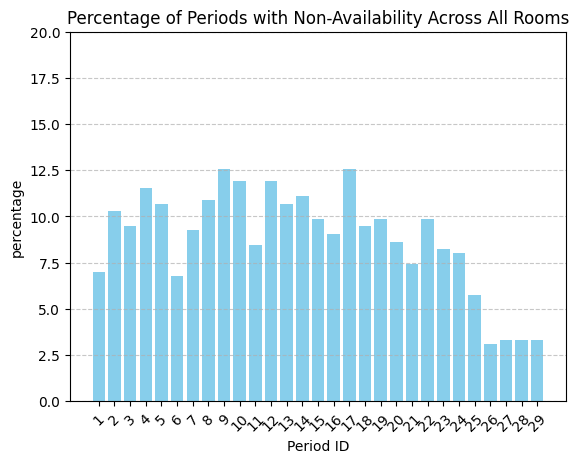

In [4]:
#overall Room disponibility during periods
#rooms_df[rooms_df['Available']].count() /rooms_df.count()
print(f"row : {len(rooms_df['Room ID'].unique())}")

subset=rooms_df.drop_duplicates(subset='Room ID')
print(f" Mean room size : {subset['Size'].mean()}")
print(f" min room size : {subset['Size'].min()}")
print(f" max room size : {subset['Size'].max()}")

print(f" Mean room alt size : {subset['Alt Size'].mean()}")
print(f" min room alt size : {subset['Alt Size'].min()}")
print(f" max room alt size : {subset['Alt Size'].max()}")
#subset["Alt Size"].mean()
non_periodes_availability=rooms_df[rooms_df['Available']==False].groupby("Period ID").size()/rooms_df.groupby("Period ID").size() *100

data=[i for i in range(1,30)]
plt.bar(data, non_periodes_availability, color='skyblue')
plt.xlabel('Period ID')
plt.ylabel('percentage')
plt.title('Percentage of Periods with Non-Availability Across All Rooms')
plt.ylim(0, 20)
plt.xticks(data,  rotation=45, fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

# Exams

| Column Name       | Data Type |
|-------------------|-----------|
| ExamID            | int64     |
| Length            | int64     |
| AltSeating        | bool      |
| MinSize           | int64     |
| MaxRooms          | int64     |
| Average           | int64     |
| PeriodID          | int64     |
| PeriodPenalty     | int64     |
| RoomID            | int64     |
| RoomPenalty       | int64     |
| AssignedPeriod    | float64   |
| AssignedRooms     | float64   |

- rows : 1864
- exams : 295

In [5]:
len(exams_df["ExamID"].unique())

1864

In [6]:
exams_df.head()

,ExamID,Length,AltSeating,MinSize,MaxRooms,Average,PeriodID,PeriodPenalty,RoomID,RoomPenalty,AssignedPeriod,AssignedRooms
0,1,120,False,0,4,2,1,0,107,0,NaN,NaN
1,1,120,False,0,4,2,1,0,447,0,NaN,NaN
2,1,120,False,0,4,2,1,0,477,0,NaN,NaN
3,1,120,False,0,4,2,1,0,90,0,NaN,NaN
4,1,120,False,0,4,2,1,0,94,0,NaN,NaN


# Students
| Column Name | Data Type |
|-------------|-----------|
| Student ID  | int64     |
| Exam IDs    | int64     |

- Student number : 33279
- Average exam by student : 3.5
- Each student has at least one exam (maximum 8 for a given period)
- 75% of students have no more than 4 exams  

In [7]:
students_df.groupby('Student ID').size()
subset=students_df.drop_duplicates(subset='Student ID')
subset.count()
students_df.head()

,Student ID,Exam IDs
0,1,852
1,1,1749
2,2,845
3,3,651
4,4,1262


# Instructors

| Column Name          | Data Type | Format |
|----------------------|-----------|------|
| Instructor ID        | int64     ||
| Exam IDs             | int64     ||
| Unavailable Periods  | string   | int64,int64|


In [8]:
instructors_df.head()

,Instructor ID,Exam IDs,Unavailable Periods
0,1,14,NaN


# Constraints

| Column Name | Data Type | Format  |  
|------------|-----------|--------|
| Constraint Type | string         |  | 
|  Constraint ID  | int64         |  | 
| Hard             | bool         |  |
| Weight           | int64         |  | 
| Exam IDs           | string         | __int64,int64__ 

## Type of constraint
| Constraint Type   | count |
|---------------|-----------|
| different-period       | 17     |
| same-period          | 3     |
| different-room     | 0     |
| precedence   | 0    |


- row : 20
- number of contstraint : 20
  

In [9]:
constraints_df.head()

,Constraint Type,Constraint ID,Hard,Weight,Exam IDs
0,different-period,1,True,0,"1411,601"
1,different-period,2,True,0,"709,1019"
2,different-period,3,True,0,"250,488"
3,different-period,4,True,0,"711,636"
4,different-period,5,True,0,"249,60"


In [10]:
 print(constraints_df.groupby("Constraint Type").count())


                  Constraint ID  Hard  Weight  Exam IDs
Constraint Type                                        
different-period             17    17      17        17
same-period                   3     3       3         3
